In [3]:
# import os, sys, distutils
# dist = distutils.core.run_setup("./detectron2/setup.py")
# !python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
# sys.path.insert(0, os.path.abspath('./detectron2'))

In [39]:
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
%matplotlib inline

from densepose import add_densepose_config
from densepose.vis.densepose_results import DensePoseResultsFineSegmentationVisualizer
from densepose.vis.extractor import create_extractor

from detectron2.config import get_cfg
from detectron2.data.detection_utils import read_image
from detectron2.engine import DefaultPredictor

config_fpath = 'densepose-configs/densepose_rcnn_R_50_FPN_s1x.yaml'
model_fpath = './checkpoints/densepose_rcnn_R_50_FPN_s1x.pkl'

cfg = get_cfg()
add_densepose_config(cfg)
cfg.merge_from_file(config_fpath)
cfg.merge_from_list(['MODEL.ROI_HEADS.SCORE_THRESH_TEST', '0.8'])
cfg.MODEL.WEIGHTS = model_fpath
cfg.freeze()

In [5]:
predictor = DefaultPredictor(cfg)

In [7]:
img = read_image('./data/train/image/00001_00.jpg', 'BGR')

In [32]:
visualizer = DensePoseResultsFineSegmentationVisualizer(cfg=cfg, alpha=1)
extractor = create_extractor(visualizer)

In [41]:
with torch.no_grad():
    outputs = predictor(img)
data = extractor(outputs['instances'])
out = np.zeros_like(img)
out = visualizer.visualize(out, data)
out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)

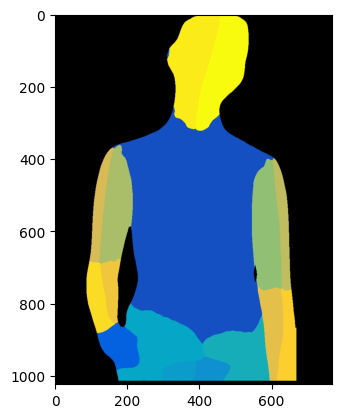

In [42]:
plt.imshow(out)
plt.show()

In [43]:
plt.imsave('test_densepose.jpg', out)